# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

import json

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"


# Define an empty list to fetch the weather data for each city

city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities  
    try:
        response = requests.get(city_url)    
        # Convert response to JSON
        response = response.json()    

        city_weather =  response["weather"][0]["main"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})
    
       # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
  
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

city_data

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | ocean shores
Processing Record 3 of Set 1 | salekhard
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | glace bay
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 8 of Set 1 | tadmur
Processing Record 9 of Set 1 | lata
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | sechura
Processing Record 13 of Set 1 | moranbah
Processing Record 14 of Set 1 | lindley
Processing Record 15 of Set 1 | thurgoona
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | alice springs
Processing Record 18 of Set 1 | zhongshu
Processing Record 19 of Set 1 | kingston
Processing Record 20 of Set 1 | san ignacio
Processing Record 21 of Set 1 | port augusta
Processing Record 22 of Set 1 | alofi

[{'City': 'port-aux-francais',
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 4.9,
  'Humidity': 66,
  'Cloudiness': 61,
  'Wind Speed': 10.51,
  'Country': 'TF',
  'Date': 1702835547},
 {'City': 'ocean shores',
  'Lat': 46.9737,
  'Lng': -124.1563,
  'Max Temp': 9.97,
  'Humidity': 84,
  'Cloudiness': 49,
  'Wind Speed': 3.13,
  'Country': 'US',
  'Date': 1702836019},
 {'City': 'salekhard',
  'Lat': 66.53,
  'Lng': 66.6019,
  'Max Temp': -21.53,
  'Humidity': 100,
  'Cloudiness': 100,
  'Wind Speed': 1.29,
  'Country': 'RU',
  'Date': 1702836020},
 {'City': 'waitangi',
  'Lat': -43.9535,
  'Lng': -176.5597,
  'Max Temp': 16.01,
  'Humidity': 94,
  'Cloudiness': 86,
  'Wind Speed': 2.24,
  'Country': 'NZ',
  'Date': 1702835549},
 {'City': 'glace bay',
  'Lat': 46.1969,
  'Lng': -59.957,
  'Max Temp': 2.83,
  'Humidity': 71,
  'Cloudiness': 75,
  'Wind Speed': 7.2,
  'Country': 'CA',
  'Date': 1702836021},
 {'City': 'puerto natales',
  'Lat': -51.7236,
  'Lng': -72.4875,
  'Max Temp':

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.90,66,61,10.51,TF,1702835547
1,ocean shores,46.9737,-124.1563,9.97,84,49,3.13,US,1702836019
2,salekhard,66.5300,66.6019,-21.53,100,100,1.29,RU,1702836020
3,waitangi,-43.9535,-176.5597,16.01,94,86,2.24,NZ,1702835549
4,glace bay,46.1969,-59.9570,2.83,71,75,7.20,CA,1702836021


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.90,66,61,10.51,TF,1702835547
1,ocean shores,46.9737,-124.1563,9.97,84,49,3.13,US,1702836019
2,salekhard,66.5300,66.6019,-21.53,100,100,1.29,RU,1702836020
3,waitangi,-43.9535,-176.5597,16.01,94,86,2.24,NZ,1702835549
4,glace bay,46.1969,-59.9570,2.83,71,75,7.20,CA,1702836021


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

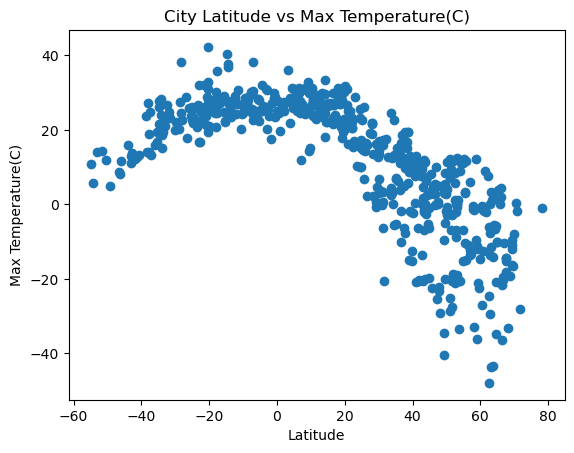

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")

# Incorporate the other graph properties

# Plot scatter plot
plt.scatter(x_values,y_values)
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title("City Latitude vs Max Temperature(C)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

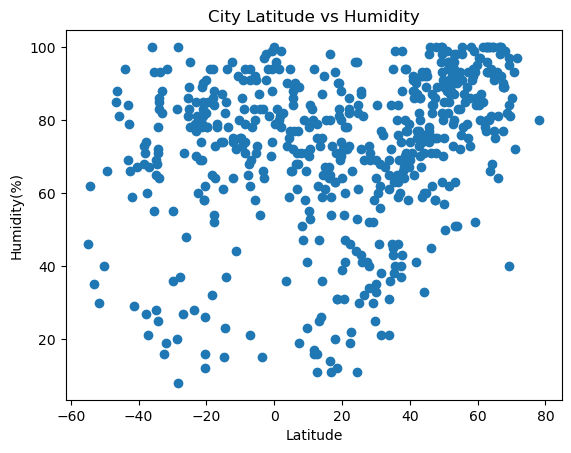

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Humidity"].astype("float")

# Incorporate the other graph properties

# Plot scatter plot
plt.scatter(x_values,y_values)
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("City Latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

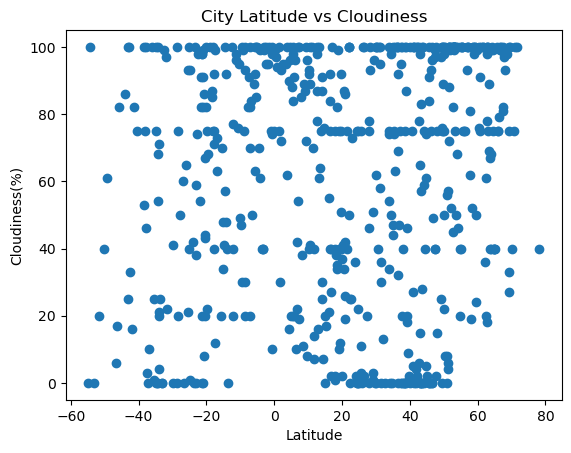

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Cloudiness"].astype("float")

# Incorporate the other graph properties

# Plot scatter plot
plt.scatter(x_values,y_values)
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("City Latitude vs Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

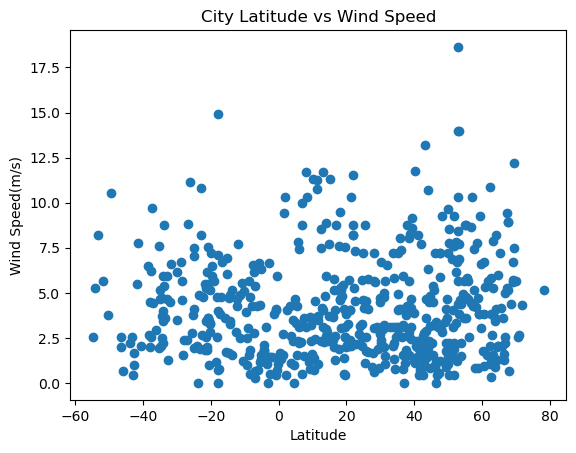

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Wind Speed"].astype("float")

# Incorporate the other graph properties

# Plot scatter plot
plt.scatter(x_values,y_values)
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title("City Latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# Run linear regression
def present_liner_regression(x_values, y_values, x_lable, y_label, title):
#x_values = city_data_df["Lat"].astype("float")
#y_values = city_data_df["Max Temp"].astype("float")

    plt.scatter(x_values,y_values)
    # Label plot
    plt.xlabel(x_lable)
    plt.ylabel(y_label)
    plt.title(title)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    # Print r square value
    print(f"The r-value is: {rvalue**2}")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (0, 180)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"


# Define an empty list to fetch the weather data for each city

city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities  
    try:
        response = requests.get(city_url)    
        # Convert response to JSON
        response = response.json()    

        city_weather =  response["weather"][0]["main"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]

        # if the city's latitude is less than 0, exclude it
        if (city_lat > 0):            
            city_lng = response["coord"]["lon"]
            city_max_temp = response["main"]["temp_max"]
            city_humidity = response["main"]["humidity"]
            city_clouds = response["clouds"]["all"]
            city_wind = response["wind"]["speed"]
            city_country = response["sys"]["country"]
            city_date = response["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city, 
                                "Lat": city_lat, 
                                "Lng": city_lng, 
                                "Max Temp": city_max_temp,
                                "Humidity": city_humidity,
                                "Cloudiness": city_clouds,
                                "Wind Speed": city_wind,
                                "Country": city_country,
                                "Date": city_date})
        
       # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
  
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

northern_hemi_df = pd.DataFrame(city_data)

# Display sample data
northern_hemi_df.head()

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aasiaat
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | egersund
Processing Record 5 of Set 1 | thaton
Processing Record 6 of Set 1 | duong dong
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | konarka
Processing Record 9 of Set 1 | dudinka
Processing Record 10 of Set 1 | vernon
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | iskateley
Processing Record 13 of Set 1 | nar'yan-mar
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | scarborough
Processing Record 17 of Set 1 | egilsstadir
Processing Record 18 of Set 1 | novobelokatay
Processing Record 19 of Set 1 | bonthe
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | tazovsky
Processing Record 22 of Set 1 | tongliao
Processing Record 23 of Set 1 | en

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,-19.24,82,98,4.39,GL,1702836184
1,yellowknife,62.4560,-114.3525,-24.69,77,20,2.06,CA,1702836053
2,longyearbyen,78.2186,15.6401,-1.09,80,40,5.14,SJ,1702836137
3,egersund,58.4513,5.9997,9.49,98,100,5.73,NO,1702836421
4,thaton,16.9206,97.3714,23.89,71,13,1.06,MM,1702836422


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-180, 0)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"


# Define an empty list to fetch the weather data for each city

city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities  
    try:
        response = requests.get(city_url)    
        # Convert response to JSON
        response = response.json()    

        city_weather =  response["weather"][0]["main"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        # only take the city's latitude less than 0
        if (city_lat < 0):            
            city_lng = response["coord"]["lon"]
            city_max_temp = response["main"]["temp_max"]
            city_humidity = response["main"]["humidity"]
            city_clouds = response["clouds"]["all"]
            city_wind = response["wind"]["speed"]
            city_country = response["sys"]["country"]
            city_date = response["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city, 
                                "Lat": city_lat, 
                                "Lng": city_lng, 
                                "Max Temp": city_max_temp,
                                "Humidity": city_humidity,
                                "Cloudiness": city_clouds,
                                "Wind Speed": city_wind,
                                "Country": city_country,
                                "Date": city_date})
    
       # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
  
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

southern_hemi_df = pd.DataFrame(city_data)
# Display sample data
southern_hemi_df.head()

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | olinda
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | san julian
Processing Record 13 of Set 1 | lamu
Processing Record 14 of Set 1 | uturoa
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | callao
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | dunedin
Processing Record 21 of Set 1 | ancud
Processing Record 22 of Set 1 | broken hill
P

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.90,66,61,10.51,TF,1702836651
1,adamstown,-25.0660,-130.1015,22.76,83,100,7.50,PN,1702836652
2,waitangi,-43.9535,-176.5597,16.01,93,86,2.68,NZ,1702836652
3,olinda,-8.0089,-34.8553,29.85,66,40,4.63,BR,1702836429
4,grytviken,-54.2811,-36.5092,5.75,62,100,5.27,GS,1702836653


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.67622609010773


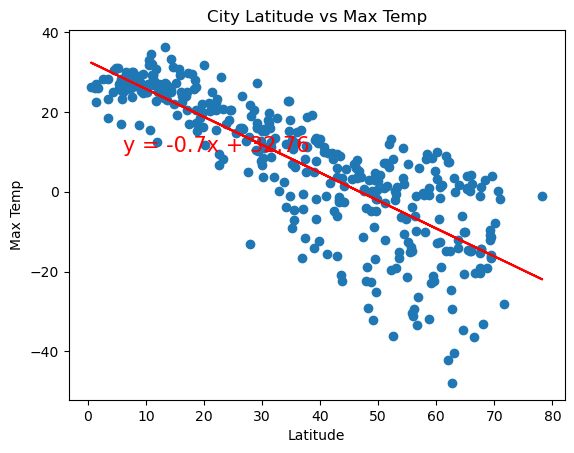

In [15]:
# Linear regression on Northern Hemisphere
present_liner_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Latitude", "Max Temp", "City Latitude vs Max Temp") 

The r-value is: 0.4917200623363156


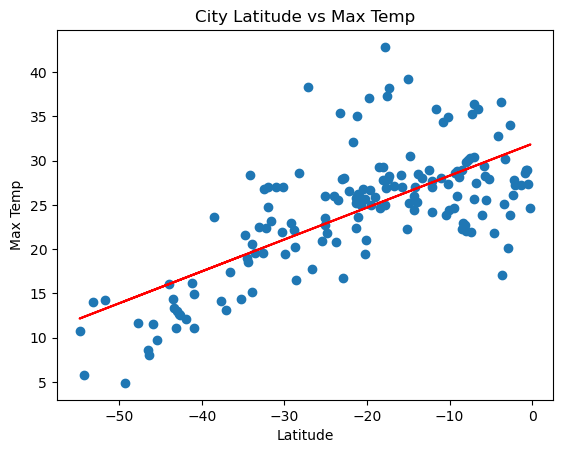

In [16]:
# Linear regression on Southern Hemisphere
present_liner_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Latitude", "Max Temp", "City Latitude vs Max Temp") 

**Discussion about the linear relationship:** Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated for City Latitdue vs Max Temp

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19850164243243137


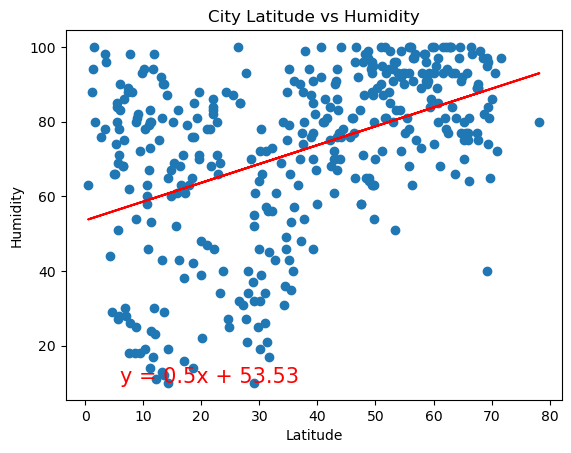

In [17]:
# Northern Hemisphere
present_liner_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Latitude", "Humidity", "City Latitude vs Humidity") 

The r-value is: 0.0015325369744701642


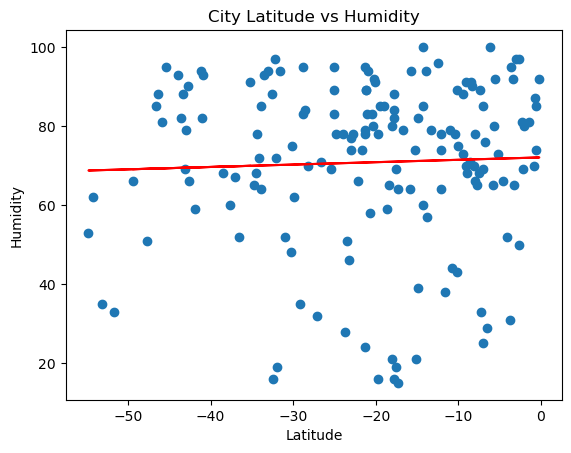

In [18]:
# Southern Hemisphere
present_liner_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Latitude", "Humidity", "City Latitude vs Humidity") 

**Discussion about the linear relationship:** City Latitude and Humidity does not have strong linear relationship due to low r-value

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.042028834301669316


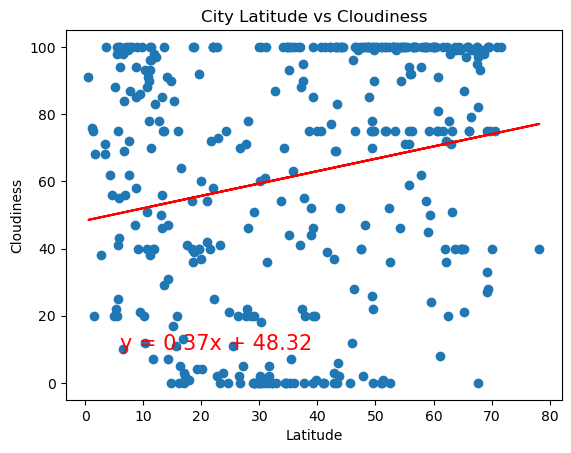

In [19]:
# Northern Hemisphere
present_liner_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Latitude", "Cloudiness", "City Latitude vs Cloudiness") 

The r-value is: 0.0768018529796737


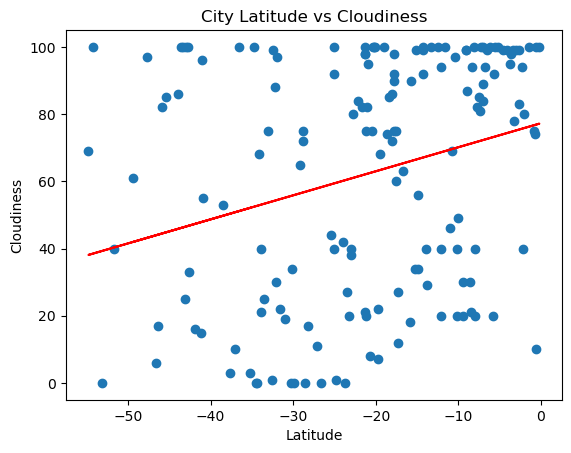

In [20]:
# Southern Hemisphere
present_liner_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Latitude", "Cloudiness", "City Latitude vs Cloudiness") 

**Discussion about the linear relationship:** A r-value near 0 indicates that no linear relationship exists between city Latitude and Cloudiness for both northern and southern Hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.023572394103133273


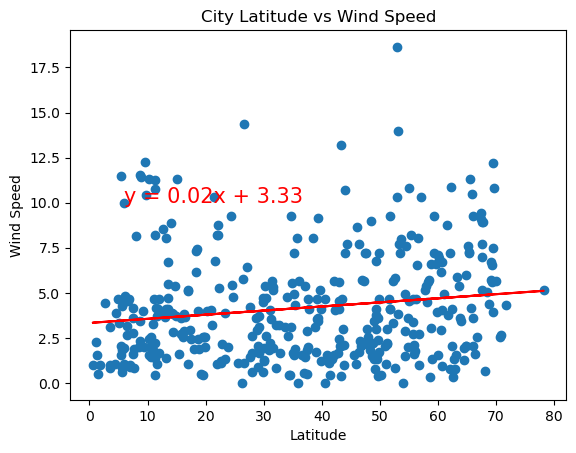

In [21]:
# Northern Hemisphere
present_liner_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Latitude", "Wind Speed", "City Latitude vs Wind Speed") 

The r-value is: 0.021822411692484476


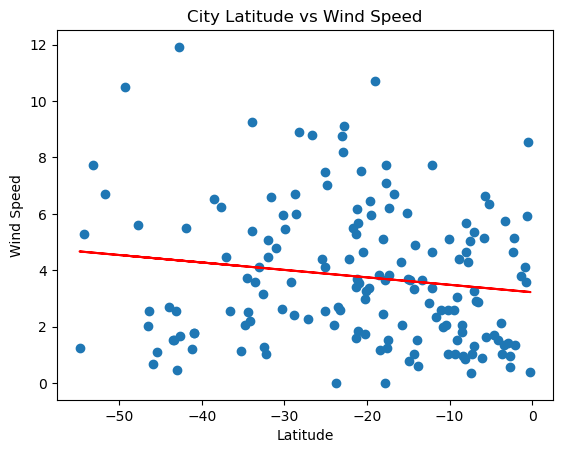

In [22]:
# Southern Hemisphere
present_liner_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Latitude", "Wind Speed", "City Latitude vs Wind Speed") 

**Discussion about the linear relationship:** A r-value close to 0 indicates that no linear relationship exists between city Latitude and Wind Speed